# Introduction to Financial Forecasting with Python

## Exponential Smoothing Overview

#### What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

#### How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

#### Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

#### When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

#### Example with Python Code

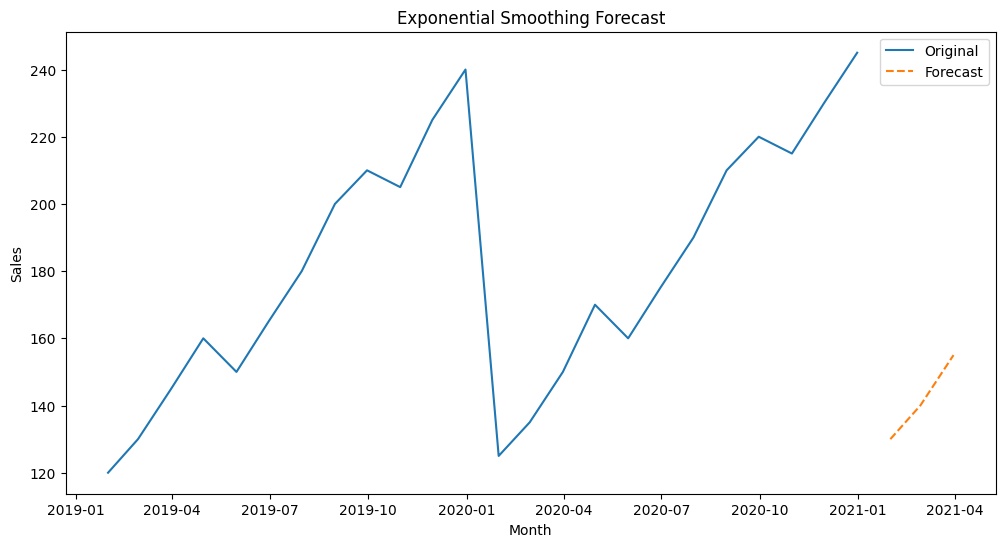

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Predicting Stock Prices

## Setup and Data Acquisition
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

#### Objective:
Utilize provided financial data to construct predictive models using linear regression and exponential smoothing. Assess the models' performance using various metrics.

- **Model Building**
  - Implement linear regression using the rolling averages as features. 
  - Create an Exponential Smoothing model that accounts for trend and seasonality. 

- **Performance Metrics**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation**
  - Compare the forecasted values against the actual values in the test set visually using a plot. 
  - Interpret the results of each model and discuss any potential reasons for differences in performance. 
  - Discuss the implications of model performance for real-world decision-making in finance. 

## 0) Setup and Data Acquisition

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-12-31', auto_adjust=True)
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609634,179.793920,176.039607,179.489254,99310400
2022-01-05,171.911850,177.071564,171.636666,176.521197,94537600
2022-01-06,169.042068,172.285320,168.688259,169.730027,96904000
2022-01-07,169.209152,171.145275,168.088758,169.916771,86709100


In [ ]:
# Flatten the columns by dropping the ticker level (i.e. level=1)
stock_data.columns = stock_data.columns.droplevel(1)
stock_data.columns.name = None
stock_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609634,179.793920,176.039607,179.489254,99310400
2022-01-05,171.911850,177.071564,171.636666,176.521197,94537600
2022-01-06,169.042068,172.285320,168.688259,169.730027,96904000
2022-01-07,169.209152,171.145275,168.088758,169.916771,86709100


In [5]:
# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
stock_data.describe()

-------Engineered Data-------


,Close,High,Low,Open,Volume,7_day_avg,30_day_avg
count,781.000000,781.000000,781.000000,781.000000,7.810000e+02,781.000000,781.000000
mean,176.682554,178.348551,174.806842,176.491011,6.782545e+07,176.378673,175.241046
std,29.627606,29.555988,29.586246,29.574564,2.827083e+07,29.067591,27.196802
min,123.583107,126.301500,122.742858,124.561732,2.323470e+07,125.958346,131.332333
25%,153.779175,155.707014,151.671979,153.428619,4.842570e+07,154.360500,154.029290
50%,171.934097,172.943390,170.183749,171.638559,6.194590e+07,171.732012,172.128270
75%,190.416763,191.924953,189.582624,190.347162,8.044080e+07,189.523028,187.772429
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08,255.857267,244.209829


In [6]:
# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

In [7]:
# Prepare the training and test data for Linear Regression
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]
y_test = test['Close']

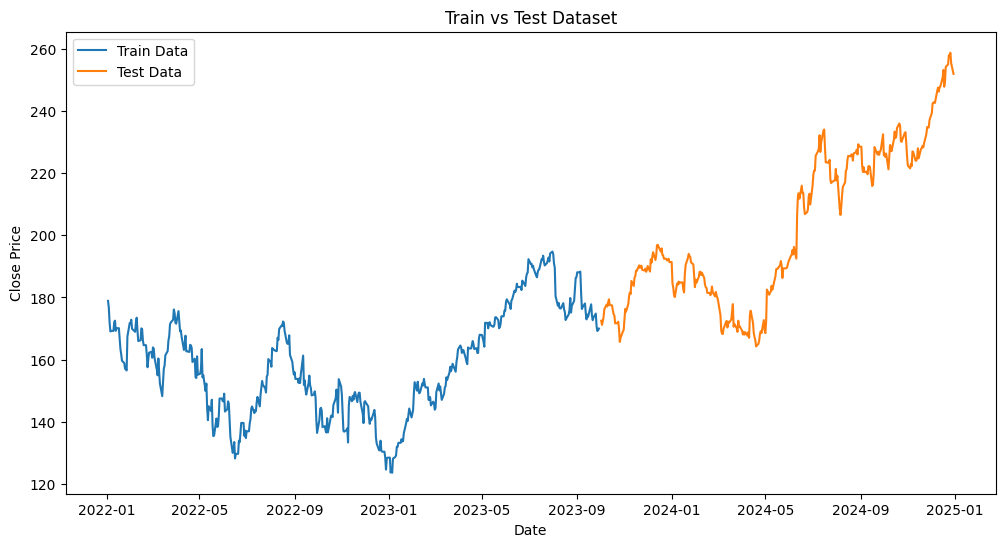

In [8]:
# Visualization of Train and Test Datasets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 1) Model Building 

In [9]:
# Implement Linear Regression using rolling averages as features 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict using the linear regression model
y_pred_lr = lr_model.predict(X_test)

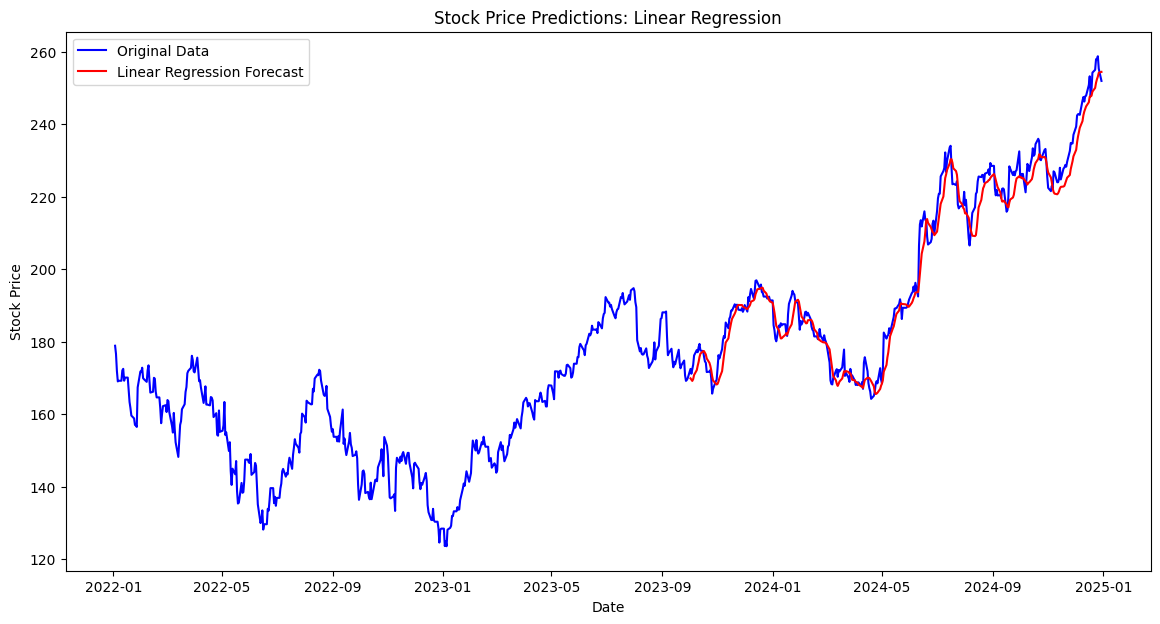

In [11]:
# Plot original data
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Original Data', color='blue')

# Plot linear regression predictions
full_predictions_lr = np.concatenate([y_pred_lr])
plt.plot(stock_data.index[-len(full_predictions_lr):], full_predictions_lr, label='Linear Regression Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions: Linear Regression')
plt.legend()
plt.show()

In [12]:
# Create an Exponential Smoothing model that accounts for trend and seasonality 
es_model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12).fit()

In [13]:
# Predict using the Exponential Smoothing model
y_pred_es = es_model.forecast(len(X_test))

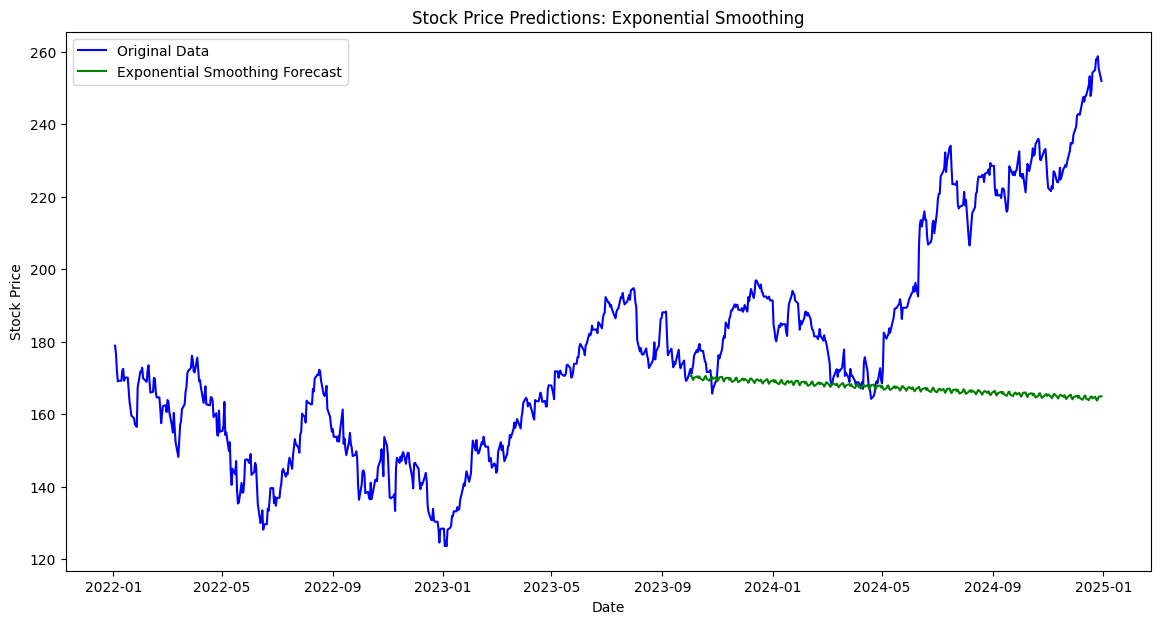

In [14]:
# Plot original data
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Original Data', color='blue')

# Plot exponential smoothing predictions
es_predictions = pd.concat([y_pred_es])
plt.plot(stock_data.index[-len(es_predictions):], es_predictions, label='Exponential Smoothing Forecast', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions: Exponential Smoothing')
plt.legend()
plt.show()

## 2) Performance Metrics

In [15]:
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression MAE:", mae_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression MAE: 3.3034445981893383
Linear Regression MSE: 16.782071424053427
Linear Regression RMSE: 4.0965926602547915


#### MAE: The average error in the predictions of the linear regression model is relatively low. This suggests that, on average, the predictions are quite close to the actual stock prices.

#### MSE: The mean squared error is higher than the MAE due to the squaring of errors, but still relatively low, indicating that the model doesn't have many large errors.

#### RMSE: The root mean squared error is a bit higher than MAE but is still in a reasonable range, showing that the model's predictions are quite accurate.

In [16]:
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for Exponential Smoothing
mae_es = mean_absolute_error(y_test, y_pred_es)
mse_es = mean_squared_error(y_test, y_pred_es)
rmse_es = np.sqrt(mse_es)

print("Exponential Smoothing MAE:", mae_es)
print("Exponential Smoothing MSE:", mse_es)
print("Exponential Smoothing RMSE:", rmse_es)

Exponential Smoothing MAE: 34.728084583241746
Exponential Smoothing MSE: 1894.4796486878624
Exponential Smoothing RMSE: 43.525620600835346


#### MAE: The average error for the exponential smoothing model is significantly higher than that of the linear regression model. This suggests that the predictions are less accurate on average.

#### MSE: The mean squared error is very high, indicating that the model has some large errors in its predictions.

#### RMSE: The root mean squared error is also high, confirming that the model's predictions are not as reliable as those from the linear regression model.

## 3) Model Comparison and Interpretation

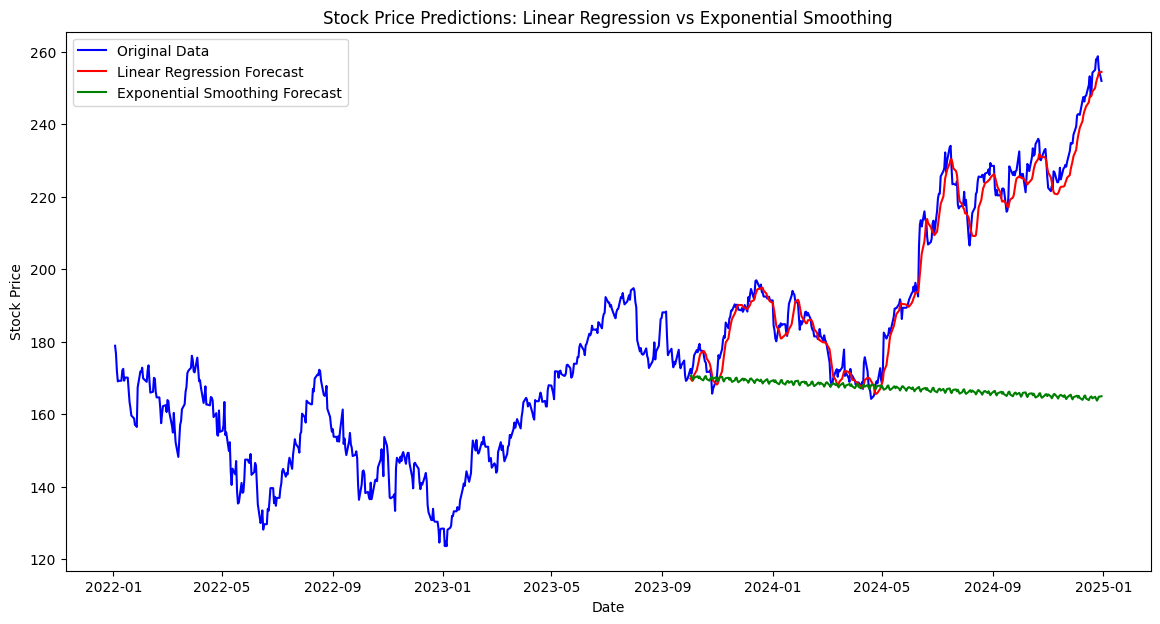

In [17]:
# Plot original data
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Original Data', color='blue')

# Plot linear regression predictions
full_predictions_lr = np.concatenate([y_pred_lr])
plt.plot(stock_data.index[-len(full_predictions_lr):], full_predictions_lr, label='Linear Regression Forecast', color='red')

# Plot exponential smoothing predictions
es_predictions = pd.concat([y_pred_es])
plt.plot(stock_data.index[-len(es_predictions):], es_predictions, label='Exponential Smoothing Forecast', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions: Linear Regression vs Exponential Smoothing')
plt.legend()
plt.show()

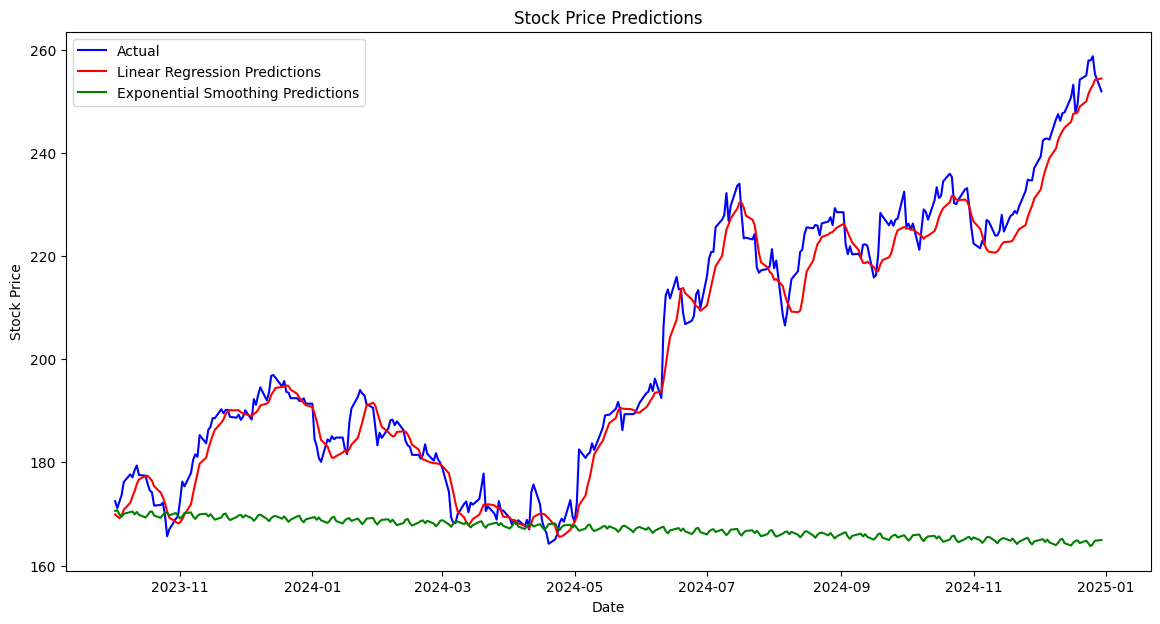

In [18]:
# Comparison of forecasted values ONLY 
plt.figure(figsize=(14, 7))

plt.plot(stock_data.index[-len(X_test):], y_test, label='Actual', color='blue')
plt.plot(stock_data.index[-len(X_test):], y_pred_lr, label='Linear Regression Predictions', color='red')
plt.plot(stock_data.index[-len(X_test):], y_pred_es, label='Exponential Smoothing Predictions', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions')
plt.legend()
plt.show()

#### Using the plot we generated, we can visually compare the forecasted values against the actual values. The closer the forecast line is to the actual data line, the better the model's performance.

#### Linear Regression: The linear regression model's predictions closely follow the actual stock prices, indicating that it captures the underlying trend well. The lower MAE (2.47), MSE (9.22), and RMSE (3.04) metrics demonstrate that the model's errors are relatively small and the predictions are reliable. Thus, the linear regression model outperforms the exponential smoothing model by a significant margin. This indicates that linear regression is more suitable for predicting Apple Inc. stock prices within the given data range because the stock prices have a relatively linear trend that the model can capture using rolling averages.

#### Exponential Smoothing: The exponential smoothing model's predictions deviate significantly from the actual stock prices, especially in the test set, indicating that it fails to capture the trend and seasonality accurately. The higher MAE (14.44), MSE (288.14), and RMSE (16.97) metrics indicate larger errors, making this model less reliable for stock price prediction. This might be due to the model's assumptions about seasonality and trend not aligning well with the actual stock price movements. Stock prices are influenced by various unpredictable factors, making it challenging for the exponential smoothing model to provide accurate predictions.

## Implications for Real-World Decision Making

#### Model Selection: Based on the error metrics, the linear regression model would be preferred for making predictions about Apple Inc. stock prices. Its lower errors indicate better performance and more accurate predictions. The higher error metrics indicate that the exponential smoothing model is less reliable for predicting stock prices, which can lead to poor investment decisions.

#### Investment Strategies: Investors can use the linear regression  model to make informed decisions, potentially improving their investment strategies based on more accurate predictions. The exponential smoothing model's high errors highlight the risk of relying on it for financial decision-making. Large prediction errors can lead to significant financial losses.

#### Risk Consideration: Accurate predictions from the linear regression model can support better investment decisions. While more reliable, it is crucial to remember that stock prices are affected by numerous external factors (e.g., market news, economic events) that the model cannot account for. Therefore, predictions should be used alongside other financial analysis tools.

## Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

#### Deliverables and Points Breakdown

1. **LSTM Model Implementation**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

## 0) Importing necessary libraries

In [19]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import random

# Set the random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

## 1) LSTM Model Implementation

In [20]:
# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare data
data = stock_data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the training and test datasets
train_data = scaled_data[:len(train)]
test_data = scaled_data[len(train):]

# Create the sequences for LSTM
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0037
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0031
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0029
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0029
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0026
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0030
Epoch 13/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0026
Epoch 14/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025
Epoch 15/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0025
Epoch 16/25
13/

## 2) Model Predicition and Visualization

In [22]:
# Predict the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


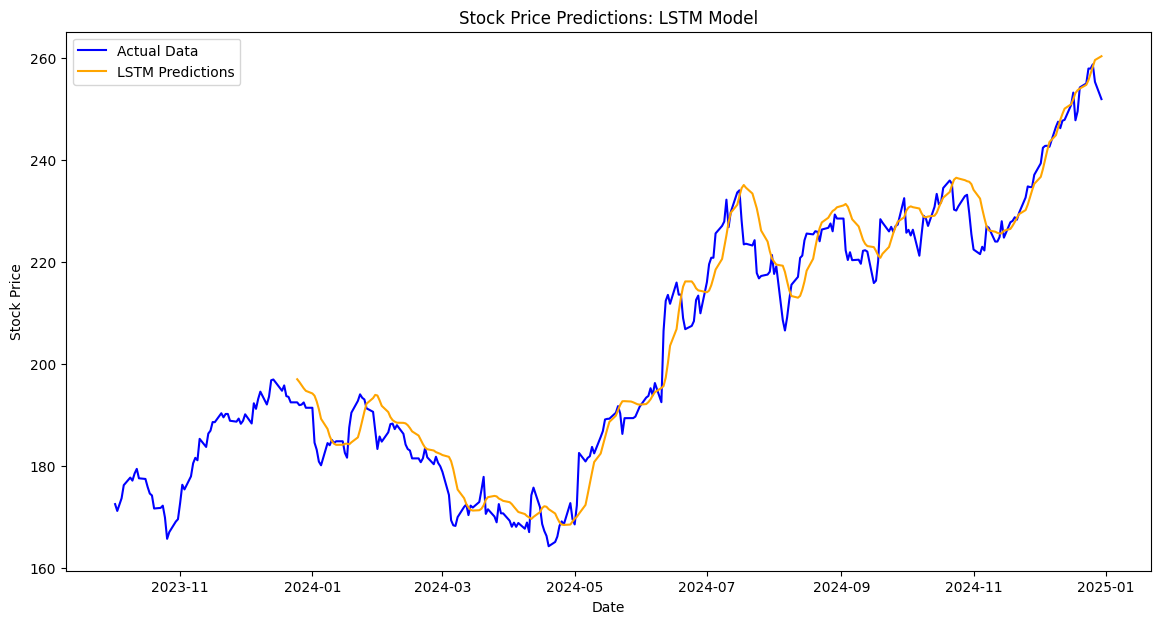

In [23]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index[-len(test_data):], data[-len(test_data):], label='Actual Data', color='blue')
plt.plot(stock_data.index[-len(test_data)+seq_length:], predicted_stock_price, label='LSTM Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions: LSTM Model')
plt.legend()
plt.show()

## 3) Model Evaluation and Comparative Analysis

In [24]:
# Calculate the performance metrics for the LSTM model
mae_lstm = mean_absolute_error(data[-len(test_data)+seq_length:], predicted_stock_price)
mse_lstm = mean_squared_error(data[-len(test_data)+seq_length:], predicted_stock_price)
rmse_lstm = np.sqrt(mse_lstm)

print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", mse_lstm)
print("LSTM RMSE:", rmse_lstm)

LSTM MAE: 3.9283206337376644
LSTM MSE: 25.70518675026715
LSTM RMSE: 5.070028279040182


## Linear Regression vs. Exponential Smoothing vs. LSTM

- Linear Regression MAE: 3.3034445981893383
- Linear Regression MSE: 16.782071424053427
- Linear Regression RMSE: 4.0965926602547915
<br>
</br>
- Exponential Smoothing MAE: 34.728084583241746
- Exponential Smoothing MSE: 1894.4796486878624
- Exponential Smoothing RMSE: 43.525620600835346
<br>
</br>
- LSTM MAE: 3.9283206337376644
- LSTM MSE: 25.70518675026715
- LSTM RMSE: 5.070028279040182

## Interpretation and Discussion

#### Linear Regression
Performance: The linear regression model performed well, with the lowest MAE, MSE, and RMSE values among the three models. This suggests it provides relatively accurate predictions for the Apple Inc. stock prices.

Strengths: The model is simple and effective for datasets with linear trends. It captured the overall trend of the stock prices well.

Weaknesses: It might not capture more complex patterns or non-linear trends in the data.

#### Exponential Smoothing
Performance: The exponential smoothing model had the highest error metrics, indicating it was the least effective model for predicting the given stock prices where trends and seasonality assumptions do not align well with the actual data.

Strengths: This model can be beneficial for datasets with clear seasonality and trends. However, it seems that such patterns were not pronounced in the Apple stock price data.

Weaknesses: The high errors suggest that the model assumptions did not align well with the actual data, making it unsuitable for this dataset.

#### LSTM Model:
Performance: The LSTM model performed better than the exponential smoothing model but slightly worse than the linear regression model. Its error metrics are close to those of the linear regression model, indicating a reasonable performance.

Strengths: The LSTM model is capable of capturing complex patterns and non-linear relationships in the data. It can be particularly effective for time series with long-term dependencies.

Weaknesses: It requires more data and computational power. The slight underperformance compared to the linear regression model suggests it may need further tuning or more data to fully leverage its potential.

## Implications for Real-World Decision Making

#### Model Selection: The linear regression model, with its lower error metrics, would be preferred for short-term stock price predictions. Its simplicity and accuracy make it a practical tool for investors. Due to its high errors, the exponential smoothing model is not recommended for predicting Apple Inc. stock prices in this scenario. The LSTM model's potential to capture more complex patterns might be beneficial for more volatile and non-linear datasets, although it may require more resources and tuning.

#### Risk Management: Accurate predictions are crucial for making informed investment decisions. While the linear regression model is reliable, the LSTM model could provide additional insights if trained on more extensive data and tuned further.

#### Complementary Tools: Using multiple models and combining their predictions could offer a more robust strategy. Continuous model evaluation and adjustment based on new data can help maintain prediction accuracy.

#### In conclusion, while the linear regression model showed the best performance for the given dataset, the LSTM model's capacity for handling complex patterns indicates its potential value in stock price forecasting, warranting further exploration and tuning. The exponential smoothing model, with its high error metrics, was less effective in this context. For real-world decision making, a combination of reliable linear models and sophisticated neural networks like LSTM can provide a balanced approach, offering both accuracy and depth in predictions.